In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

sns.set()

# PyTorch
Dr. Facundo A. Lucianna - Aprendizaje Automático - CEIoT - FIUBA

PyTorch nos ofrece una serie de herramientas que no solo nos permite armar redes profundas, sino que además realizar diferentes operaciones de transformaciones y mediciones de métricas de evaluación.

Hoy en dia es una libreria muy popular, dado que nos facilita realizar procesamiento que normalmente se necesitaría de conocimientos más avanzados de programación, como por ejemplo, el acceso al uso de la GPU, en el cual es transparente al usuario.

## Instalación 

En este caso vamos a instalar sin realizar nada para hacer andar la GPU. Esto dependerá de que marca de GPU tengan o inclusive de arquitectura.

Para instalar PyTorch únicamente para CPU hacemos:

`!pip3 install torch torchvision torchaudio`

In [2]:
# Llamamos a la libreria
import torch

## Tensores de PyTorch

PyTorch nos presenta una estructura de datos similar a arrays o matrices, llamada tensores. Los tensores es nuestra estructura que nos permite codificar nuestras entradas o salidas

In [3]:
# Igual que Numpy podemos crear tensores a mano

tensor1 = torch.tensor([1, 2])
tensor2 = torch.tensor([[1, 2], [3, 4]])

In [4]:
tensor1

tensor([1, 2])

In [5]:
tensor2

tensor([[1, 2],
        [3, 4]])

In [6]:
# Podemos crearlo desde un array de Numpy, lo que nos da la forma de interactuar entre ellos
numpy_array = np.ones([10, 3])
tensor3 = torch.from_numpy(numpy_array)

In [7]:
tensor3

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [8]:
# También tenemos formas similares a la de numpy
shape = (2,3)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tensor aleatorio: \n {rand_tensor} \n")
print(f"Tensor de unos: \n {ones_tensor} \n")
print(f"Tensor de ceros: \n {zeros_tensor}")

Tensor aleatorio: 
 tensor([[0.1955, 0.1992, 0.7281],
        [0.2701, 0.0237, 0.1308]]) 

Tensor de unos: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tensor de ceros: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
# Igual que Numpy, los tensores tiene atributos que nos permiten entender mejor como están formados

print(f"Tamaño del tensor: {rand_tensor.shape}")
print(f"Tipo de dato del tensor: {rand_tensor.dtype}")
print(f"En donde está guardado el tensor: {rand_tensor.device}")

Tamaño del tensor: torch.Size([2, 3])
Tipo de dato del tensor: torch.float32
En donde está guardado el tensor: cpu


Torch tiene como 100 operaciones de tensores implementadas. Incluyen operaciones aritmeticas, algebra lineal, manipulación de matrices, muestreo, concatenado, etc. La lista completa de cosas que se pueden hacer la pueden ver [acá](https://pytorch.org/docs/stable/torch.html)

In [10]:
tensor_test = torch.ones(4, 4)
print(f"Primera fila: {tensor_test[0]}")
print(f"Primera columna: {tensor_test[:, 0]}")
print(f"Ultima columna: {tensor_test[:, -1]}")

# Asignamos usando slicing
tensor_test[:,1] = 0
print(tensor_test)

Primera fila: tensor([1., 1., 1., 1.])
Primera columna: tensor([1., 1., 1., 1.])
Ultima columna: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# Como podemos ir de Numpy -> Tensor, podemos ir al revés
numpy_array = tensor_test.numpy()

print(numpy_array)

# Si tenemos la GPU habilitada, esto es más poderoso, porque nos permite ir de 
# CPU a GPU y viceversa

[[1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]


## Datasets y dataloaders

PyTorch también nos da herramientas para manejar datasets. Para ello nos provee de *torch.utils.data.DataLoader* y *torch.utils.data.Dataset*. Dataset nos permite almacenar observaciones y labels, y DataLoader nos permite definir iterables para permitirnos acceder a los datos.

## Construyendo una red neuronal

Dado que como vimos que una red está conformado por capas:

![](./neuronnetex.png)

Por lo que la forma que construimos redes en PyTorch es de similar forma. Aca vamos a construir todas redes *fully connected* que son redes feed-foward. 

Para construir una red neuronal, creamos una clase que hereda la clase **torch.nn.Module**. *torch.nn.Module*  cuenta con todos los bloques que se necesita para construir una red neuronal y permite realizar todas las operaciones para obtener un valor de salida.

Empecemos creando algunas redes

### Perceptron

Para crear el perceptron creamos una clase llamada **perceptron** que tiene como padre a **torch.nn.Module**. En su *init()* definimos a las capas:

- torch.nn.Sequential: Es un contenedor que nos permite ir apilando las capas que queremos de nuestra red. Este contenedor ademas se ocupa de conectas a las capas
- torch.nn.Linear: Es la capa que tiene los pesos de la entrada. En PyTorch, esa capa hay que especificarla, para que quede claro que es lineal (recordar $w_1 x_1 + w_2 x_2 + \cdots + w_n x_n$)
- torch.nn.Sigmoid: Es la capa de función de activación que usamos (Sigmoide)

In [12]:
class perceptron(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input_size, output_size),
            torch.nn.Sigmoid()
        )
        
    #Define a la parte de predicción
    def forward(self, x):

        # Pasamos por el perceptron
        y_prob = self.layers(x)

        return y_prob
    
    def digital_out(self, x):

        y_prob = self.layers(x)

        return torch.heaviside((y_prob * 2) - 1, values=torch.tensor(0.))
        

Para arrancar, entremos a la red para que aprenda la función AND

In [13]:
# Entrenos al perceptron para que pueda reproducir a la función AND de tres variables
X_array = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1.]])

X = torch.from_numpy(X_array)
X = X.to(torch.float32)

y = torch.zeros((8, 1))
y[-1] = 1

Para entrenar con PyTorch necesitamos:

- Una función de coste que nos permita calcular el error. Es la función para que podamos movernos con el gradiente dado los pesos. Las que nos ofrece PyTorch la podemos ver [acá](https://pytorch.org/docs/stable/nn.html#loss-functions)
- Un optimizador que nos permita encontrar los pesos sinápticos al aplicar back-propagation. Hay muchas variantes del gradiente descendiente. Aquí usaremos Stochastic Gradient Descendant. Pueden ver más información [acá](https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer)

Entonces para entrenar debemos:

1. Iniciar la red, el optimizador y la función de coste.
2. Fijar los gradientes en cero. Esto nos permite limpiar calculos viejos.
3. Obtener una predicción inicial de la red
4. Calcular el error generado por la red.
5. Propagar el error mediante back-propagation.
6. Aplicamos el optimizador
7. Repetimos los pasos 2 al 6

In [14]:
# Creamos el perceptron de tres entradas y una salida
net = perceptron(3, 1)
# Usamos como función de error a Entropía Cruzada Binaria, recomendada para clasificación
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1)

# Creamos una lista que mida el error en el loop
errors = list()

# Realizamos la iteración
for epoch in range(1000):

    # Para cada uno de los datos del dataset
    values = np.random.permutation(X.shape[0])
    for i in values:
        # Limpiamos los gradientes
        optimizer.zero_grad()

        # Obtenemos todas las predicciones
        outputs = net(X[i])

        # Calculamos el error
        loss = criterion(outputs, y[i])

        # Propagamos el error
        loss.backward()

        # Optimizamos los parametros
        optimizer.step()

    errors.append(loss.item())

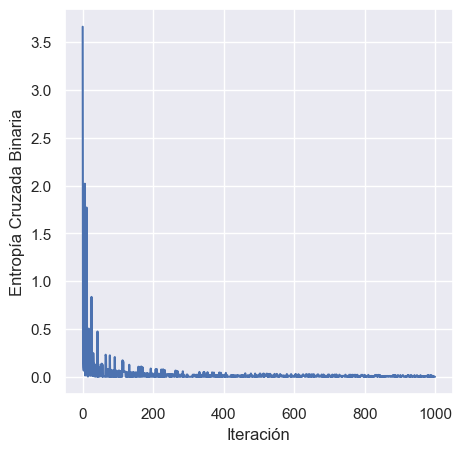

In [15]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("Entropía Cruzada Binaria")
ax.set_xlabel("Iteración")
plt.show();

In [16]:
# Probemos a la red
test_1 = net.digital_out(torch.tensor([0., 0, 1]))
test_2 = net.digital_out(torch.tensor([1., 1, 1]))

print(f"Si la entrada es 0, 0, 1, la salida es: {test_1.item()}")
print(f"Si la entrada es 1, 1, 1, la salida es: {test_2.item()}")

Si la entrada es 0, 0, 1, la salida es: 0.0
Si la entrada es 1, 1, 1, la salida es: 1.0


## Perceptron como regresión

Usando un perceptrón, usémoslo en un ejemplo de regresión. Para ello vamos a convertir de Fahrenheit a Celsius. En la vida real, esto no tendría sentido, pero es a modo didáctico.

In [17]:
# Primero definamos la función, que nos devuelva el valor de grado Celsius dado Fahrenheit
def far_to_celsius(farenheit):
    return (farenheit - 32) / 1.8

X_numpy = np.linspace(0, 220, 60000).reshape([-1, 1])
y_numpy = far_to_celsius(X_numpy).reshape([-1, 1])

# Creamos los valores de entrada
X = torch.from_numpy(X_numpy).reshape([-1, 1])
X = X.to(torch.float32)

y = torch.from_numpy(y_numpy).reshape([-1, 1])
y = y.to(torch.float32)

In [18]:
# Creamos el perceptron para regresión
class perceptron(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # En este caso solo nos quedamos con los datos lineales
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 1),
        )
    
    def forward(self, x):

        # Pasamos por el perceptron
        y_prob = self.layers(x)

        return y_prob

In [19]:
y[torch.randperm(X.shape[0])[:10]]

tensor([[78.6511],
        [ 3.1246],
        [49.3376],
        [48.3741],
        [53.7153],
        [11.9716],
        [35.9805],
        [22.3118],
        [11.7170],
        [70.8755]])

In [20]:
# Creamos el perceptron para regresión
net = perceptron()
# Usamos como función de error a MSE
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters()) 

# Creamos una lista que mida el error en el loop
errors = list()

# Realizamos la iteración
for epoch in range(40000):

    values = torch.randperm(X.shape[0])

    subsetX = X[values[:50]]
    subsety = y[values[:50]]

    # Limpiamos los gradientes
    optimizer.zero_grad()

    # Obtenemos todas las predicciones
    outputs = net(subsetX)

    # Calculamos el error
    loss = criterion(outputs, subsety)

    # Propagamos el error
    loss.backward()

    # Optimizamos los parámetros
    optimizer.step()

    errors.append(loss.item())

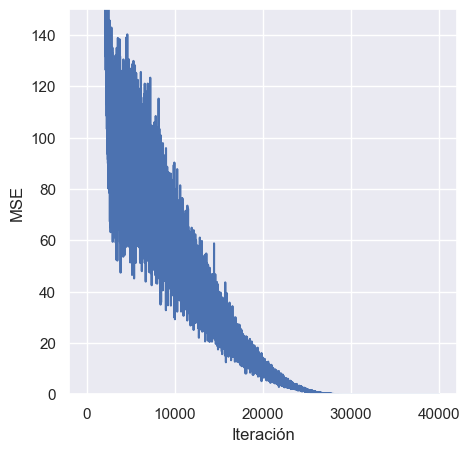

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("MSE")
ax.set_xlabel("Iteración")
ax.set_ylim([0, 150])
plt.show();

In [22]:
# Probemos a la red
test_1 = torch.tensor([[73.4]])
test_1 = test_1.to(torch.float32)
test_2 = torch.tensor([[104]])
test_2 = test_2.to(torch.float32)

print(f"Si tenemos 73.4F, en centígrado según el modelo es: {net(test_1).item()}")
print(f"Si tenemos 73.4F, en centígrado de verdad es: {far_to_celsius(73.4)}")
print(f"Si tenemos 104F, en centígrado según el modelo es: {net(test_2).item()}")
print(f"Si tenemos 104F, en centígrado de verdad es: {far_to_celsius(104)}")

Si tenemos 73.4F, en centígrado según el modelo es: 23.000001907348633
Si tenemos 73.4F, en centígrado de verdad es: 23.000000000000004
Si tenemos 104F, en centígrado según el modelo es: 40.0
Si tenemos 104F, en centígrado de verdad es: 40.0


## Revisitando reconociendo caras

Volvamos al dataset que vimos en la clase de SVM, [Labeled Faces in the Wild](https://vis-www.cs.umass.edu/lfw/), que consiste en miles de fotos de diversas figuras públicas. Scikit-Learn la incluye en su libreria.

In [23]:
from sklearn.datasets import fetch_lfw_people

# Para trabajar con este dataset, vamos a usar personas con mas de 60 fotos
faces = fetch_lfw_people(min_faces_per_person=60)

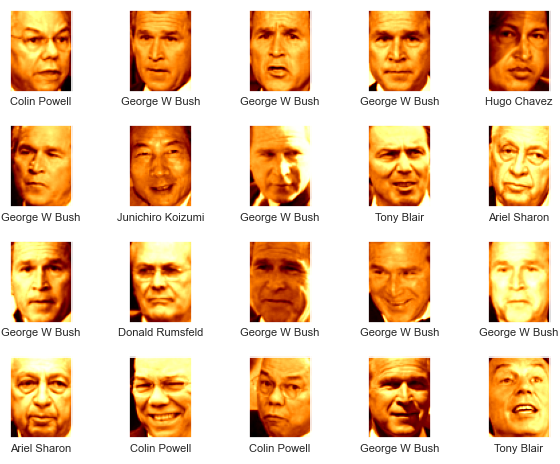

In [24]:
fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='afmhot')
    axi.set(xticks=[], yticks=[],
            xlabel=(faces.target_names[faces.target[i]]))
    axi.xaxis.label.set_size(8) 
plt.tight_layout()

In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

pca = PCA(n_components=150, whiten=True)

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

# Aplicamos PCA
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Usando [Dataset](https://pytorch.org/vision/0.18/datasets.html) creamos un dataset para cargar las caras

In [26]:
from torch.utils.data import Dataset, DataLoader

class LFWDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image = self.data[idx]
        label = int(self.target[idx])
        
        return image, label

# Creamos los datasets
lfw_dataset_train = LFWDataset(X_train_pca, y_train)
lfw_dataset_test = LFWDataset(X_test_pca, y_test)

Creamos un iterable usando [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) de cada set:

In [27]:
batch_size = 32
lfw_loader_train = DataLoader(dataset=lfw_dataset_train, batch_size=batch_size, shuffle=True)
lfw_loader_test = DataLoader(dataset=lfw_dataset_test, batch_size=batch_size, shuffle=False)

Creemos la red:

In [28]:
class FaceFeedForwardNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, num_classes):
        super(FaceFeedForwardNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, hidden_size2)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

Definimos los parámetros de la red: 

OBS: Estos son hiperparámetros, como la cantidad de capas, por lo que podemos jugar un poco.

In [29]:
input_size = 150  
hidden_size = 64
hidden_size2 = 8
num_classes = len(set(y_train))

Creamos la red, definimos la función de costo y el algoritmo de entrenamiento:

In [30]:
model = FaceFeedForwardNN(input_size, hidden_size, hidden_size2, num_classes)

In [31]:
criterion = torch.nn.CrossEntropyLoss() # Cross entropy es usado para clasificaciones multiple clase
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [32]:
num_epochs = 300
errors = list()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(lfw_loader_train):
        
        # Obtenemos todas las predicciones y calculamos la perdida
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Limpiamos los gradientes
        optimizer.zero_grad()

        # Propagamos el error
        loss.backward()

        # Optimizamos los parámetros
        optimizer.step()

        errors.append(loss.item())

    # Print estadísticas de entrenamiento
    if epoch % 10 == 0:
        print(f'Época: {epoch + 1}/{num_epochs}, Costo de Entrenamiento: {loss.item():.4f}')


Época: 1/300, Costo de Entrenamiento: 2.0960
Época: 11/300, Costo de Entrenamiento: 1.8932
Época: 21/300, Costo de Entrenamiento: 1.4936
Época: 31/300, Costo de Entrenamiento: 1.5341
Época: 41/300, Costo de Entrenamiento: 1.2634
Época: 51/300, Costo de Entrenamiento: 1.0165
Época: 61/300, Costo de Entrenamiento: 0.7602
Época: 71/300, Costo de Entrenamiento: 0.4960
Época: 81/300, Costo de Entrenamiento: 0.4598
Época: 91/300, Costo de Entrenamiento: 0.5109
Época: 101/300, Costo de Entrenamiento: 0.4087
Época: 111/300, Costo de Entrenamiento: 0.2630
Época: 121/300, Costo de Entrenamiento: 0.2619
Época: 131/300, Costo de Entrenamiento: 0.1608
Época: 141/300, Costo de Entrenamiento: 0.1191
Época: 151/300, Costo de Entrenamiento: 0.0935
Época: 161/300, Costo de Entrenamiento: 0.0416
Época: 171/300, Costo de Entrenamiento: 0.0402
Época: 181/300, Costo de Entrenamiento: 0.0268
Época: 191/300, Costo de Entrenamiento: 0.0280
Época: 201/300, Costo de Entrenamiento: 0.0239
Época: 211/300, Costo de

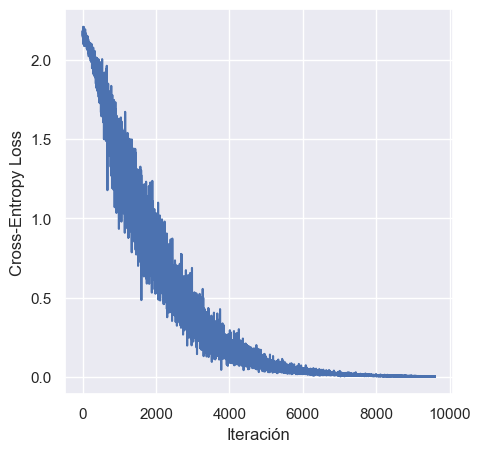

In [33]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("Cross-Entropy Loss")
ax.set_xlabel("Iteración")
plt.show();

Con la red entrenada, podemos evaluar con el set de evaluación:

In [34]:
# Evaluamos el modelo:
model.eval()

predictions = []
with torch.no_grad():
    for images, labels in lfw_loader_test:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Guardamos las predicciones
        predictions.extend(predicted.numpy())  # Las convertimos en array asi podemos usar scikit-learn
        
y_pred = np.array(predictions)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.82      0.85      0.83        68
  Donald Rumsfeld       0.69      0.71      0.70        31
    George W Bush       0.87      0.83      0.85       126
Gerhard Schroeder       0.70      0.61      0.65        23
      Hugo Chavez       0.73      0.55      0.63        20
Junichiro Koizumi       0.73      0.92      0.81        12
       Tony Blair       0.78      0.86      0.82        42

         accuracy                           0.80       337
        macro avg       0.75      0.76      0.75       337
     weighted avg       0.80      0.80      0.79       337



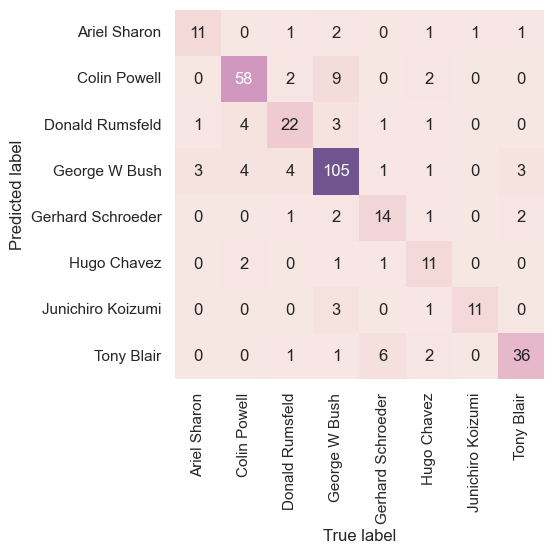

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5))
plt.xlabel('True label')
plt.ylabel('Predicted label');

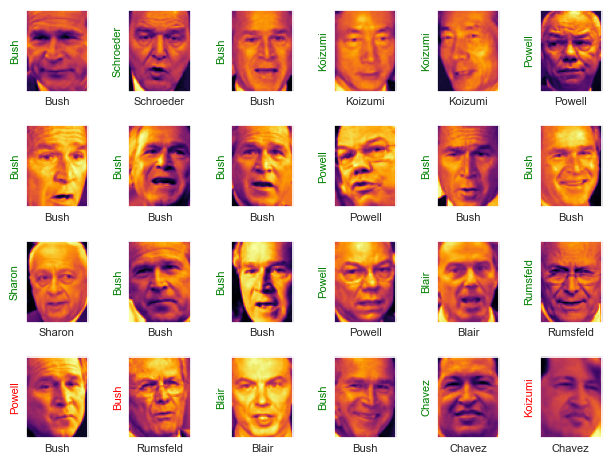

In [37]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='inferno')
    axi.set(xticks=[], yticks=[],
            xlabel=(faces.target_names[y_test[i]].split()[-1]))
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='green' if y_pred[i] == y_test[i] else 'red')
    axi.xaxis.label.set_size(8) 
    axi.yaxis.label.set_size(8)
plt.tight_layout()

Si comparamos con respecto a SVC, vemos que rindió peor. Esto deja en evidencia el porqué durante los 90 las redes neuronales fueron superadas por redes más sencillas. Nos costó mucho más armar nuestra red, y llegamos a resultados similares o un poco más que SVC. Para este tipo de dataset.

----
Usando otro tipo de redes más modernas (redes convolucionales) podemos llegar a resultados de SVC, pero a expensa de un lento entrenamiento, por lo que claramente se recomienda usar Deep Learning para datasets más grandes:

OBS: Un beneficio de esta red frente a SVC es que no necesitamos aplicar PCA.

In [38]:
lfw_faces = fetch_lfw_people(min_faces_per_person=60)

X_train, X_test, y_train, y_test = train_test_split(lfw_faces.images, lfw_faces.target, random_state=42)

In [39]:
import torchvision.transforms as transforms

class LFWDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = data
        self.target = target
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.target[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

transform = transforms.Compose([
    transforms.ToTensor(),  # Convertimos en tensores
    transforms.Normalize((0.5,), (0.5,))  # Y normalizamos
])

batch_size = 32

train_dataset = LFWDataset(X_train, y_train, transform=transform)
test_dataset = LFWDataset(X_test, y_test, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [40]:
# Definimos una red convolucional:
class ConvNet(torch.nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.out_size = self._get_conv_output_size()
        
        self.fc1 = torch.nn.Linear(self.out_size, 1000)
        self.relu_linear = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(1000, num_classes)
    
    def _get_conv_output_size(self):
        # Testeteamos con dummy para calcular la capa de salida
        batch_size = 1
        dummy_input = torch.zeros(batch_size, 1, 62, 47) 
        dummy_output = self.layer2(self.layer1(dummy_input))
        return dummy_output.view(batch_size, -1).size(1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) 
        out = self.fc1(out)
        out = self.relu_linear(out)
        out = self.fc2(out)
        return out

# Inicializamos el modelo, la funcion de costo y el optimizador
model = ConvNet(num_classes=len(set(y_train)))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [41]:
# Entrenamos el modelo (esto va a llevar un tiempo)
num_epochs = 60
errors = list()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Obtenemos todas las predicciones y calculamos la perdida
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Limpiamos los gradientes
        optimizer.zero_grad()

        # Propagamos el error
        loss.backward()

        # Optimizamos los parámetros
        optimizer.step()

        errors.append(loss.item())

    # Print estadísticas de entrenamiento
    if epoch % 2 == 0:
        print(f'Época: {epoch}/{num_epochs}, Costo de Entrenamiento: {loss.item():.4f}')


Época: 0/60, Costo de Entrenamiento: 1.9698
Época: 2/60, Costo de Entrenamiento: 1.3760
Época: 4/60, Costo de Entrenamiento: 0.9638
Época: 6/60, Costo de Entrenamiento: 0.3349
Época: 8/60, Costo de Entrenamiento: 0.2499
Época: 10/60, Costo de Entrenamiento: 0.1547
Época: 12/60, Costo de Entrenamiento: 0.0553
Época: 14/60, Costo de Entrenamiento: 0.2533
Época: 16/60, Costo de Entrenamiento: 0.1231
Época: 18/60, Costo de Entrenamiento: 0.2182
Época: 20/60, Costo de Entrenamiento: 0.0197
Época: 22/60, Costo de Entrenamiento: 0.0135
Época: 24/60, Costo de Entrenamiento: 0.0197
Época: 26/60, Costo de Entrenamiento: 0.0296
Época: 28/60, Costo de Entrenamiento: 0.0479
Época: 30/60, Costo de Entrenamiento: 0.0135
Época: 32/60, Costo de Entrenamiento: 0.0132
Época: 34/60, Costo de Entrenamiento: 0.0075
Época: 36/60, Costo de Entrenamiento: 0.0153
Época: 38/60, Costo de Entrenamiento: 0.0027
Época: 40/60, Costo de Entrenamiento: 0.0023
Época: 42/60, Costo de Entrenamiento: 0.0121
Época: 44/60, C

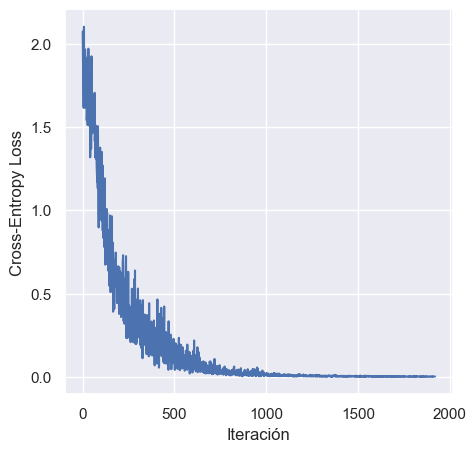

In [42]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("Cross-Entropy Loss")
ax.set_xlabel("Iteración")
plt.show();

In [43]:
# Evaluamos el modelo:
model.eval()

predictions = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Guardamos las predicciones
        predictions.extend(predicted.numpy())  # Las convertimos en array asi podemos usar scikit-learn
        
y_pred = np.array(predictions)

In [44]:
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.67      0.69        15
     Colin Powell       0.94      0.91      0.93        68
  Donald Rumsfeld       0.82      0.87      0.84        31
    George W Bush       0.93      0.87      0.90       126
Gerhard Schroeder       0.78      0.91      0.84        23
      Hugo Chavez       0.88      0.75      0.81        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.85      0.98      0.91        42

         accuracy                           0.88       337
        macro avg       0.85      0.87      0.86       337
     weighted avg       0.89      0.88      0.88       337



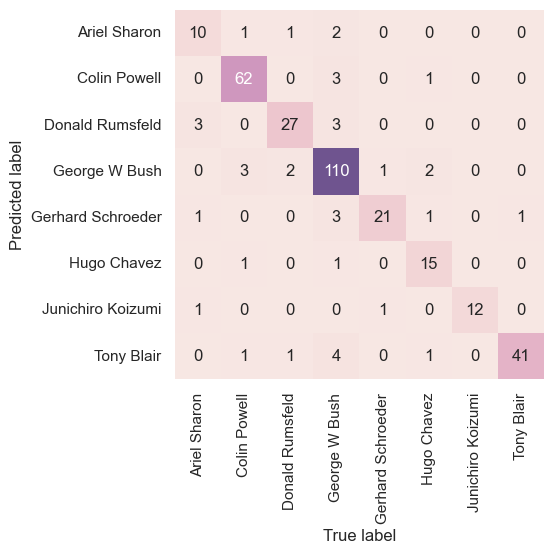

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5))
plt.xlabel('True label')
plt.ylabel('Predicted label');

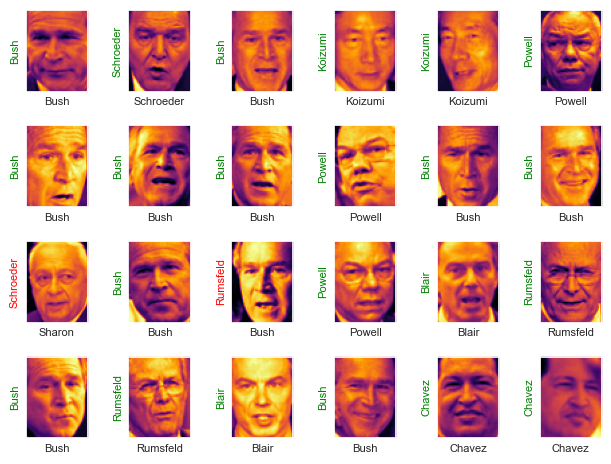

In [46]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='inferno')
    axi.set(xticks=[], yticks=[],
            xlabel=(faces.target_names[y_test[i]].split()[-1]))
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='green' if y_pred[i] == y_test[i] else 'red')
    axi.xaxis.label.set_size(8) 
    axi.yaxis.label.set_size(8)
plt.tight_layout()